<a href="https://colab.research.google.com/github/manishmishra01/Machienlearg_project/blob/main/Machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Data Represtation or Visulization libarary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Feature transform libarary
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Metrics libarary
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
#Algorithm libarry

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# this is regression task inside now aim to predicts the calfornia house price prediction based on input features and output features so here in this dataset input Target features is medium_house_value=estimate price in dollar $

# **Dataset Loading **
loding dataset in csv format using th help of pandaslibarary
*read_csv() =this function Helps read the dataset

In [4]:
# load datset using pd.read_csv("dataset.csv")
df=pd.read_csv("/content/sample_data/california_housing_train.csv")


# Data **Representations**

1.   df.head()-->gives the five data in series
2.   df.tail()-->gives the five data in bottom to up


1.   df.shape-->its tells the shape of dataset how many featues ors column
2.   df.nunique()-->nums of unique value in my dataset



1.   df.dtypes()-->it tells the type of data like int float object
2.   df.columns()-->its show the column of dataset


1.   df.describe()-->its gives the statical sumary of datset

1.   df.info()-->its give about the datainformation














In [ ]:
# check the few rows of dataset
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [ ]:
# check  the buttom  few rows of the datset
df.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0

In [ ]:
# shape the dataset here
df.shape


(17000, 9)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 17000 non-null  float64
 1   latitude                  17000 non-null  float64
 2   housing_median_age        17000 non-null  float64
 3   total_rooms               17000 non-null  float64
 4   total_bedrooms            17000 non-null  float64
 5   population                17000 non-null  float64
 6   households                17000 non-null  float64
 7   median_income             17000 non-null  float64
 8   median_house_value        17000 non-null  float64
 9   rooms_per_household       17000 non-null  float64
 10  bedrooms_per_room         17000 non-null  float64
 11  population_per_household  17000 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [ ]:
# check the no of unique values in th dataset
df.nunique()

longitude               827
latitude                840
housing_median_age       52
total_rooms            5533
total_bedrooms         1848
population             3683
households             1740
median_income         11175
median_house_value     3694
dtype: int64

In [ ]:
# check the which types of  data
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [ ]:
# check the columns of dataset
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
# check the statical summary datasets
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

# Statical Summary Dataset Overview


*   All numerical features contain 17,000 non-null values,
indicating no missing data in numerical columns.


*   The `longitude` and `latitude` features indicate that the data represents housing information from **California**.
Geographic location is expected to play a significant role in determining house prices, and its impact is likely to be **non-linear**.

*   no missing values in the dataset


*  The housing median age ranges from 1 to 52 years.
*  Room, population, and household features show
large maximum values compared to their medians,
indicating right-skewed distributions and potential outliers.










# Data clearning


1.   df.isnull()-->its used to check the null value in the dataset
2.   df.isnull().sum().sum()-->it is uses for check the total no of missing values



1.   df.duplicates()-->check if any duplicates values in dataset




In [ ]:
# check the data null values
df.isnull()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
16995      False     False               False        False           False   
16996      False     False               False        False           False   
16997      False     False               False        False           False   
16998      False     False               False        False           False   
16999      False     False               False        False           False   

       population  households  median_income  median_house_value  
0           False       False          False               False  
1           False       False          False               False  
2           False       False          False               False  
3           False       False          False               False  
4           False       False          False               False  
...           ...         ...            ...                 ...  
16995       False       False          False               False  
16996       False       False          False               False  
16997       False       False          False               False  
16998       False       False          False               False  
16999       False       False          False               False  

[17000 rows x 9 columns]

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
total_percent=(df.isnull().sum()/len(df))*100
total_percent

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
dtype: float64

In [ ]:
df.duplicated().sum()

np.int64(0)

# Data cleaning Observation




*   No missing values is this datset
*   checked each of column not showing andy mising value


*   Here is no duplicates values
*   At the last no need to data cleaning and no need to use the
imputation technique like
simple imputer ,knn imputer

*   Here is only numeric values










In [ ]:
#

# EDA(Explory Data Analysis)


1.   Univariant Analysis(single-column) -->Target Variable Focus
2.   Bivariant Analysis(feature vs Target)


1.   Multivariate Analysis (feature ↔ feature ↔ target)
2.   Correlation Analysis


1.   Outlier Analysis
2.   Summary of the EDA







In [ ]:
# first of i take the copy of dataset because if data is corrupted or anythings i can use copy data
copy_data=df.copy()

# Univariant Analysis


> Why This step to choose because




*   Understand distribution
*   Detect skewness


*   Spot outliers
*   Decide transformations

# Techiniques used


1.   histplot()-->Shows skewness & spread,For numeric Features
2.   Boxplot()-->shows the outliers ,median ,IQR ,Used For Outlier Detection



1.   countplot()-->if catogorical data is included ,deals with catogrical data










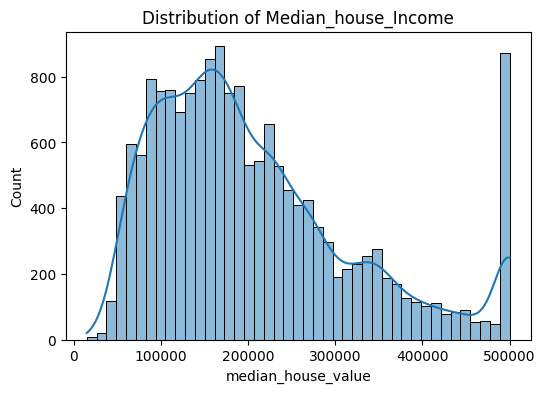

In [ ]:
# target variable analysis
plt.figure(figsize=(6,4))
sns.histplot(df['median_house_value'], kde=True)
plt.title("Distribution of Median_house_Income")
plt.show()


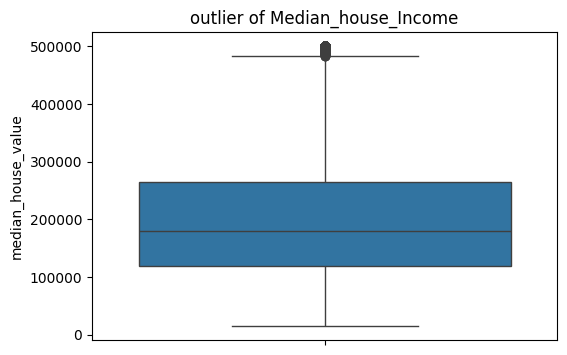

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(df['median_house_value'])
plt.title("outlier of Median_house_Income")
plt.show()


# After Analysis The Tareget Variable
 Target variable show right skew   destribution
 when check the distrubtion using the histplot also some give outlier when cheked the outlier using the boxplot
# Decide part


*   Not remove Outlier or skewness
    
*   because in housepirce outliers are sensetive or impactfull not remove becaus high value is more expensive house

*   whithout domain not knowledge if removed impact on my model



# Techeniqu to solve this part


*   when use linearbase model i used log transform
*   when to use Tree based model its handle automatically



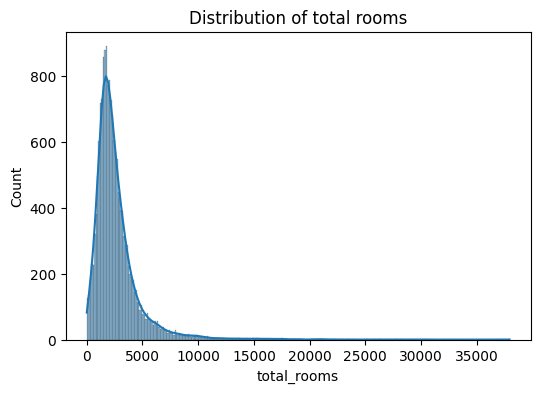

In [ ]:
# check another colums
# target variable analysis
plt.figure(figsize=(6,4))
sns.histplot(df['total_rooms'], kde=True)
plt.title("Distribution of total rooms")
plt.show()


In [ ]:
# instead of check the one column distrubution i checked all numeric columns using the for loop or subplot() histplot()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

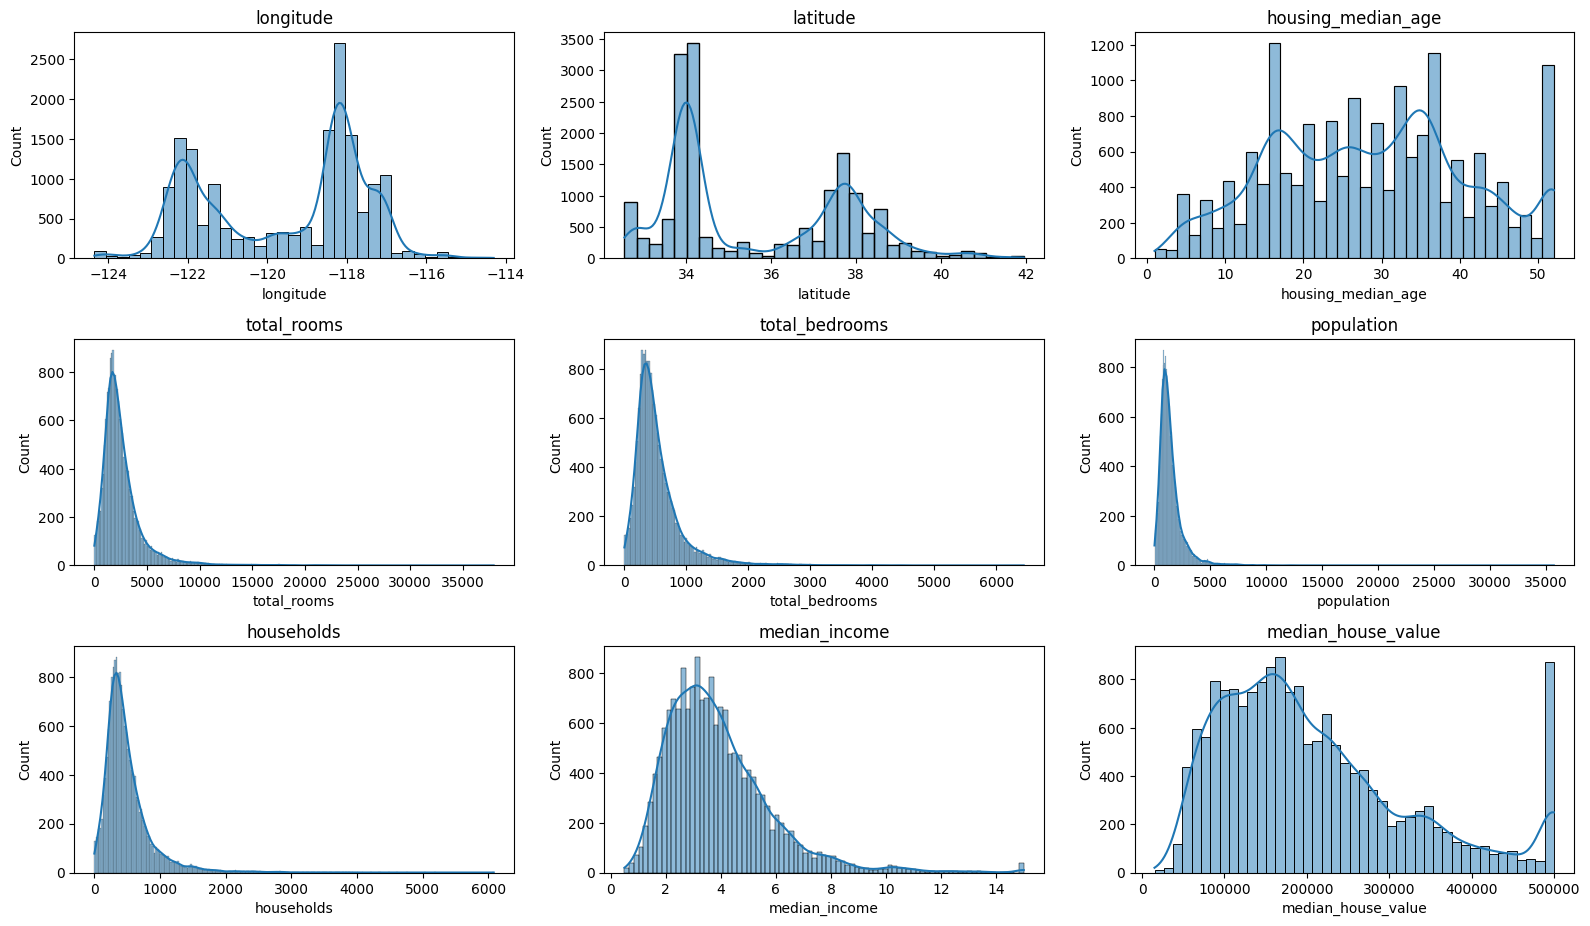

In [ ]:

plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)   # adjust grid if needed
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()


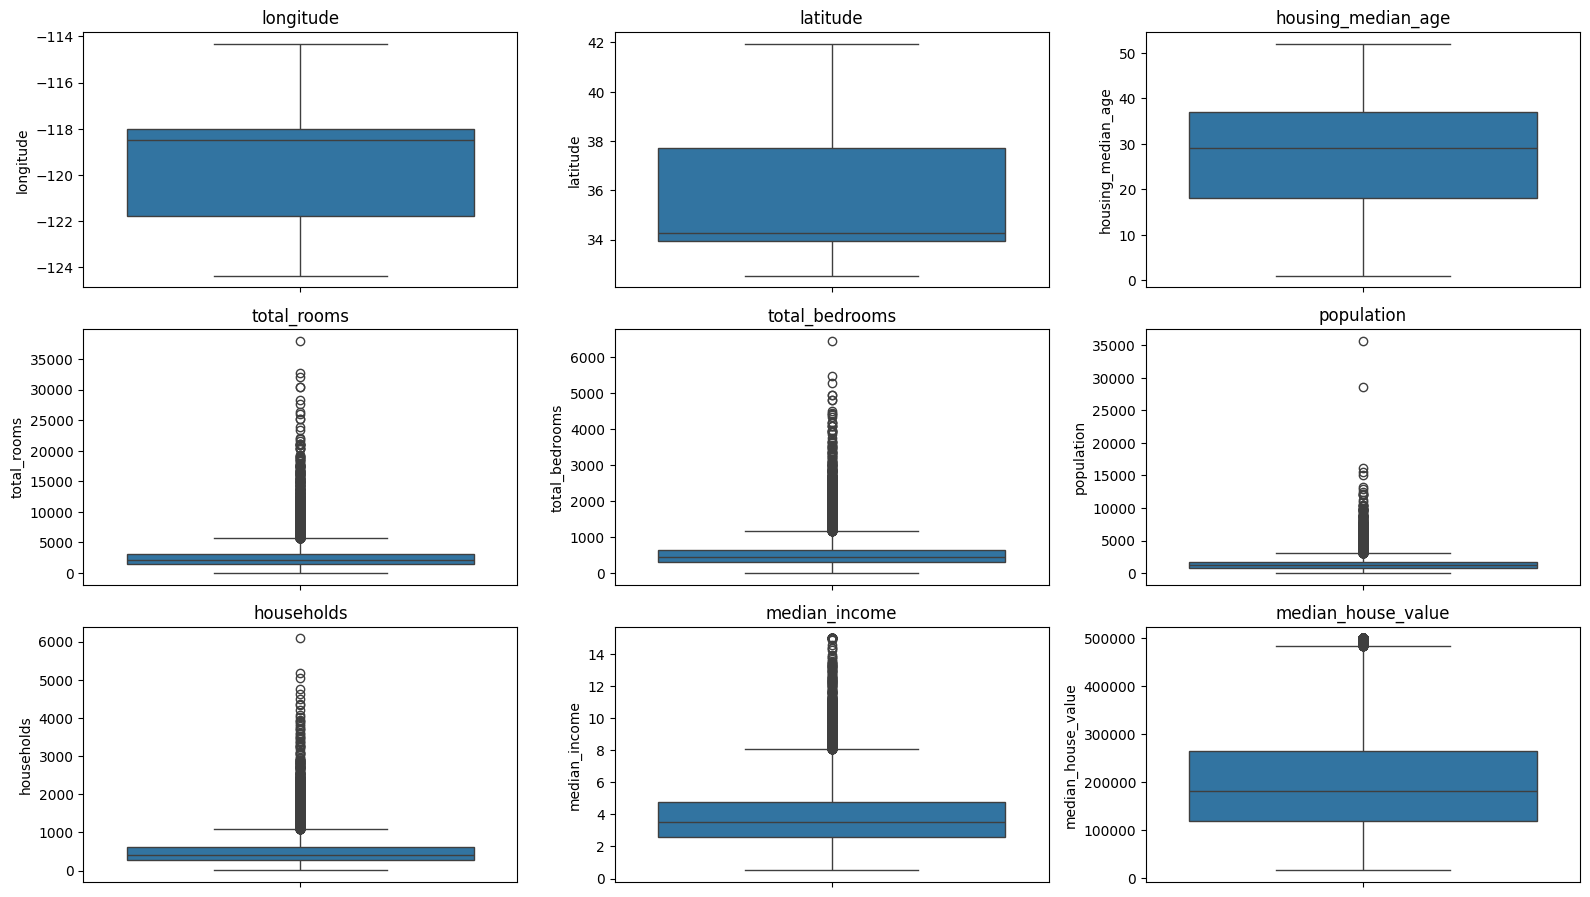

In [ ]:

plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)   # adjust grid if needed
    sns.boxplot(df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


In [4]:
df.skew().sort_values(ascending=False)


population            5.187212
total_rooms           4.002730
households            3.342668
total_bedrooms        3.322637
median_income         1.626693
median_house_value    0.973037
latitude              0.471801
housing_median_age    0.064894
longitude            -0.304003
dtype: float64

# Bivariant Analysis


1.   Bivariate analysis = analyzing the relationship between two variables

*   Feature (X) vs Target (y)
*   Or Feature vs Feature (to detect redundancy, multicollinearity) or Correlation


2.   Why Bivariate Analysis is IMPORTANT


*   Identify important features
*   Decide feature transformations


*   Choose right model (Linear vs Tree-based)
*  Spot data leakage or redundancy

# Techinique used


1.   corr()-->its used to check ther correclation features
2.   scatterplot()-->check the linear relationship(target vs feature)

1.   regplot()-->its check the linearty or curve











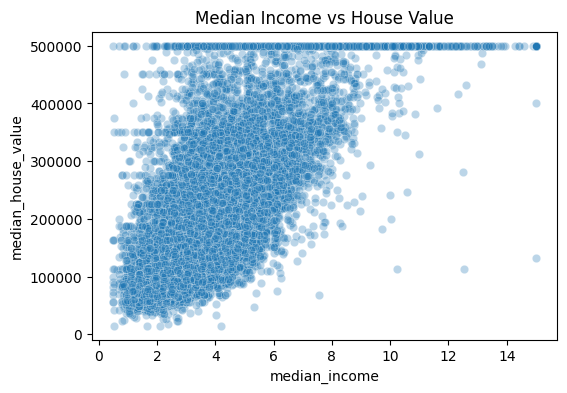

In [5]:
# scatter plot to check the relationship of target vs feature
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'], alpha=0.3)
plt.title("Median Income vs House Value")
plt.show()


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def bivariate_scatter_all(df, target):
    numeric_cols = df.select_dtypes(include='number').columns
    features = [col for col in numeric_cols if col != target]

    n = len(features)
    rows = (n // 3) + 1

    plt.figure(figsize=(18, rows * 4))

    for i, col in enumerate(features, 1):
        plt.subplot(rows, 3, i)
        sns.scatterplot(
            x=df[col],
            y=df[target],
            alpha=0.3
        )
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f"{col} vs {target}")

    plt.tight_layout()
    plt.show()


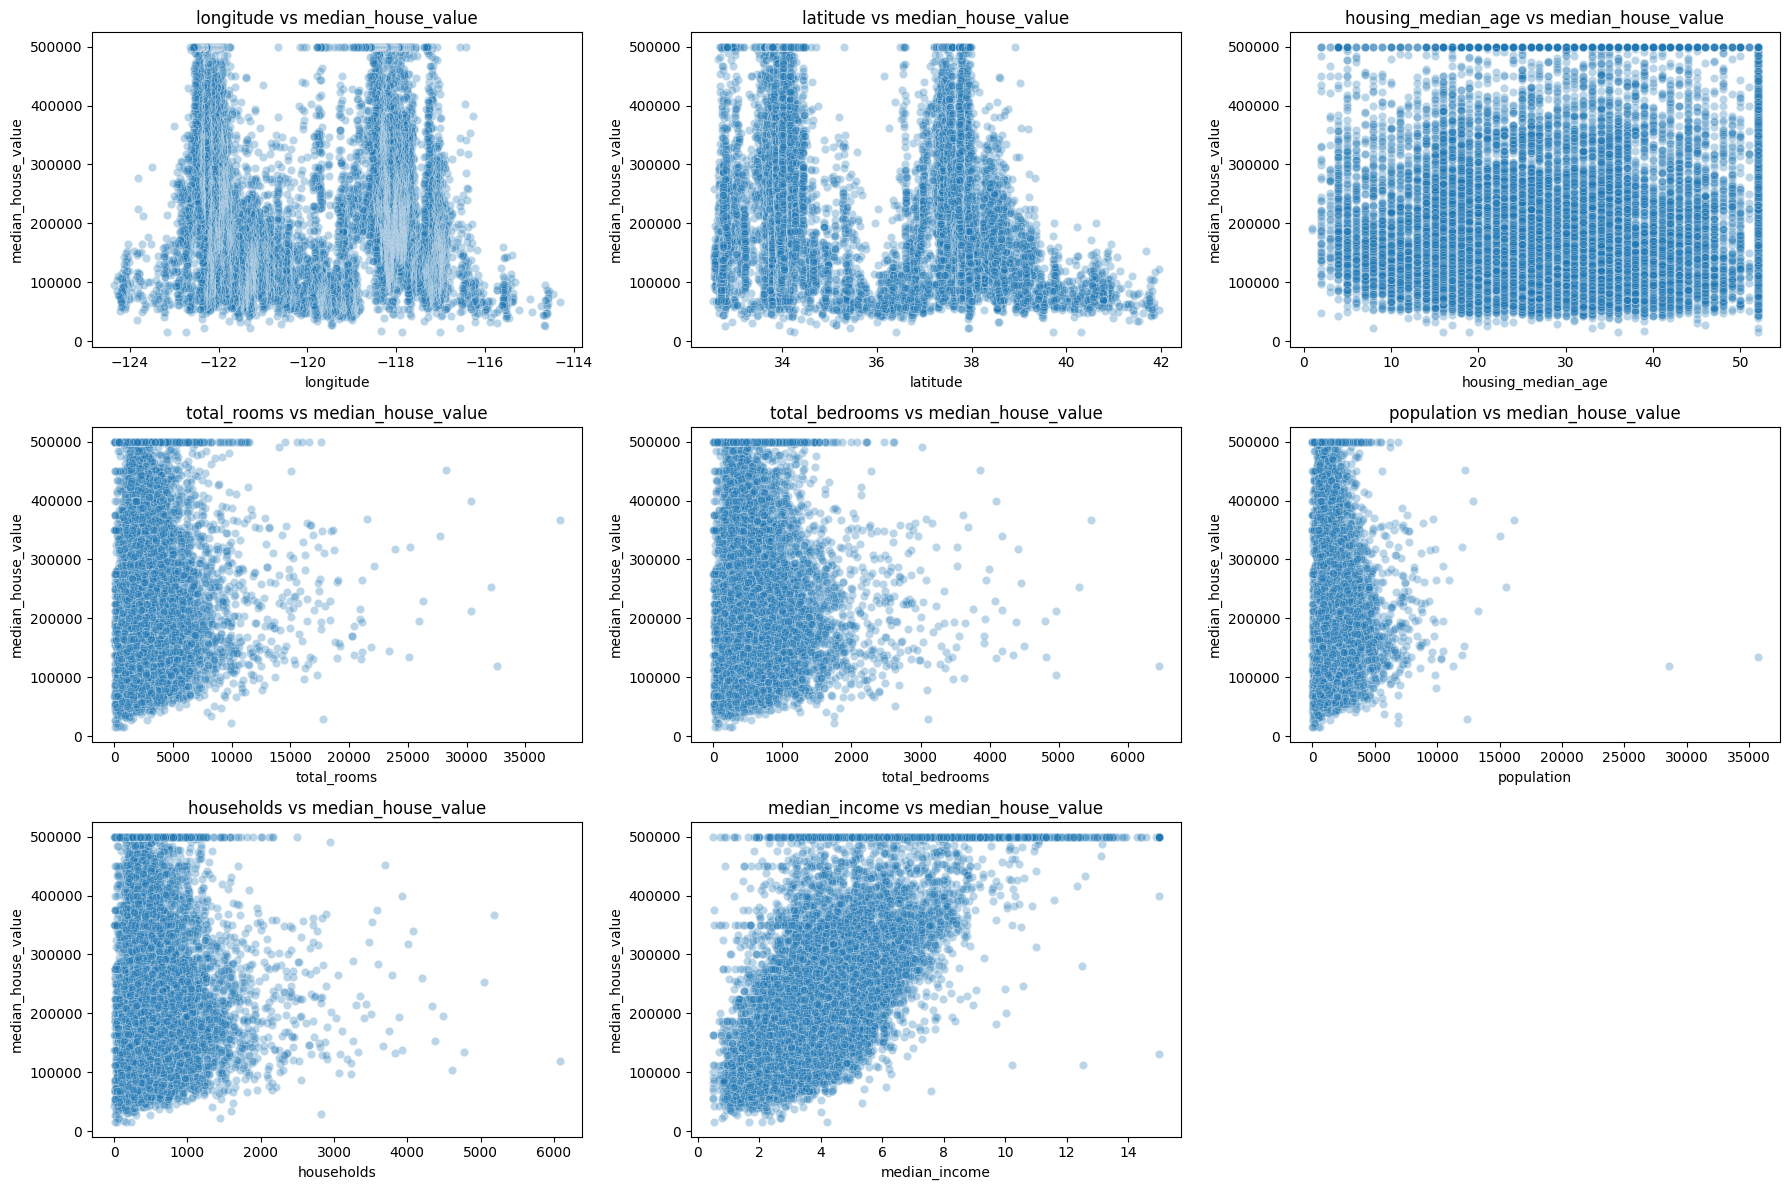

In [7]:
bivariate_scatter_all(df, target="median_house_value")


In [ ]:
#

In [5]:
# find the correraltion of dataset
df.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0.106758     0.130991   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071802    0.101674    0.059628      -0.015485   
latitude                 -0.069373   -0.111261   -0.074902      -0.080303   
housing_median_age       -0.320434   -0.295890   -0.302754      -0.115932   
total_rooms               0.928403    0.860170    0.919018       0.195383   
total_bedrooms            1.000000    0.881169    0.980920      -0.013495   
population                0.881169    1.000000    0.909247      -0.000638   
households                0.980920    0.909247    1.000000       0.007644   
median_income            -0.013495   -0.000638    0.007644       1.000000   
median_house_value        0.045783   -0.027850    0.061031       0.691871   

                    median_house_value  
longitude                    -0.044982  
latitude                     -0.144917  
housing_median_age            0.106758  
total_rooms                   0.130991  
total_bedrooms                0.045783  
population                   -0.027850  
households                    0.061031  
median_income                 0.691871  
median_house_value            1.000000

<Figure size 1000x800 with 0 Axes>

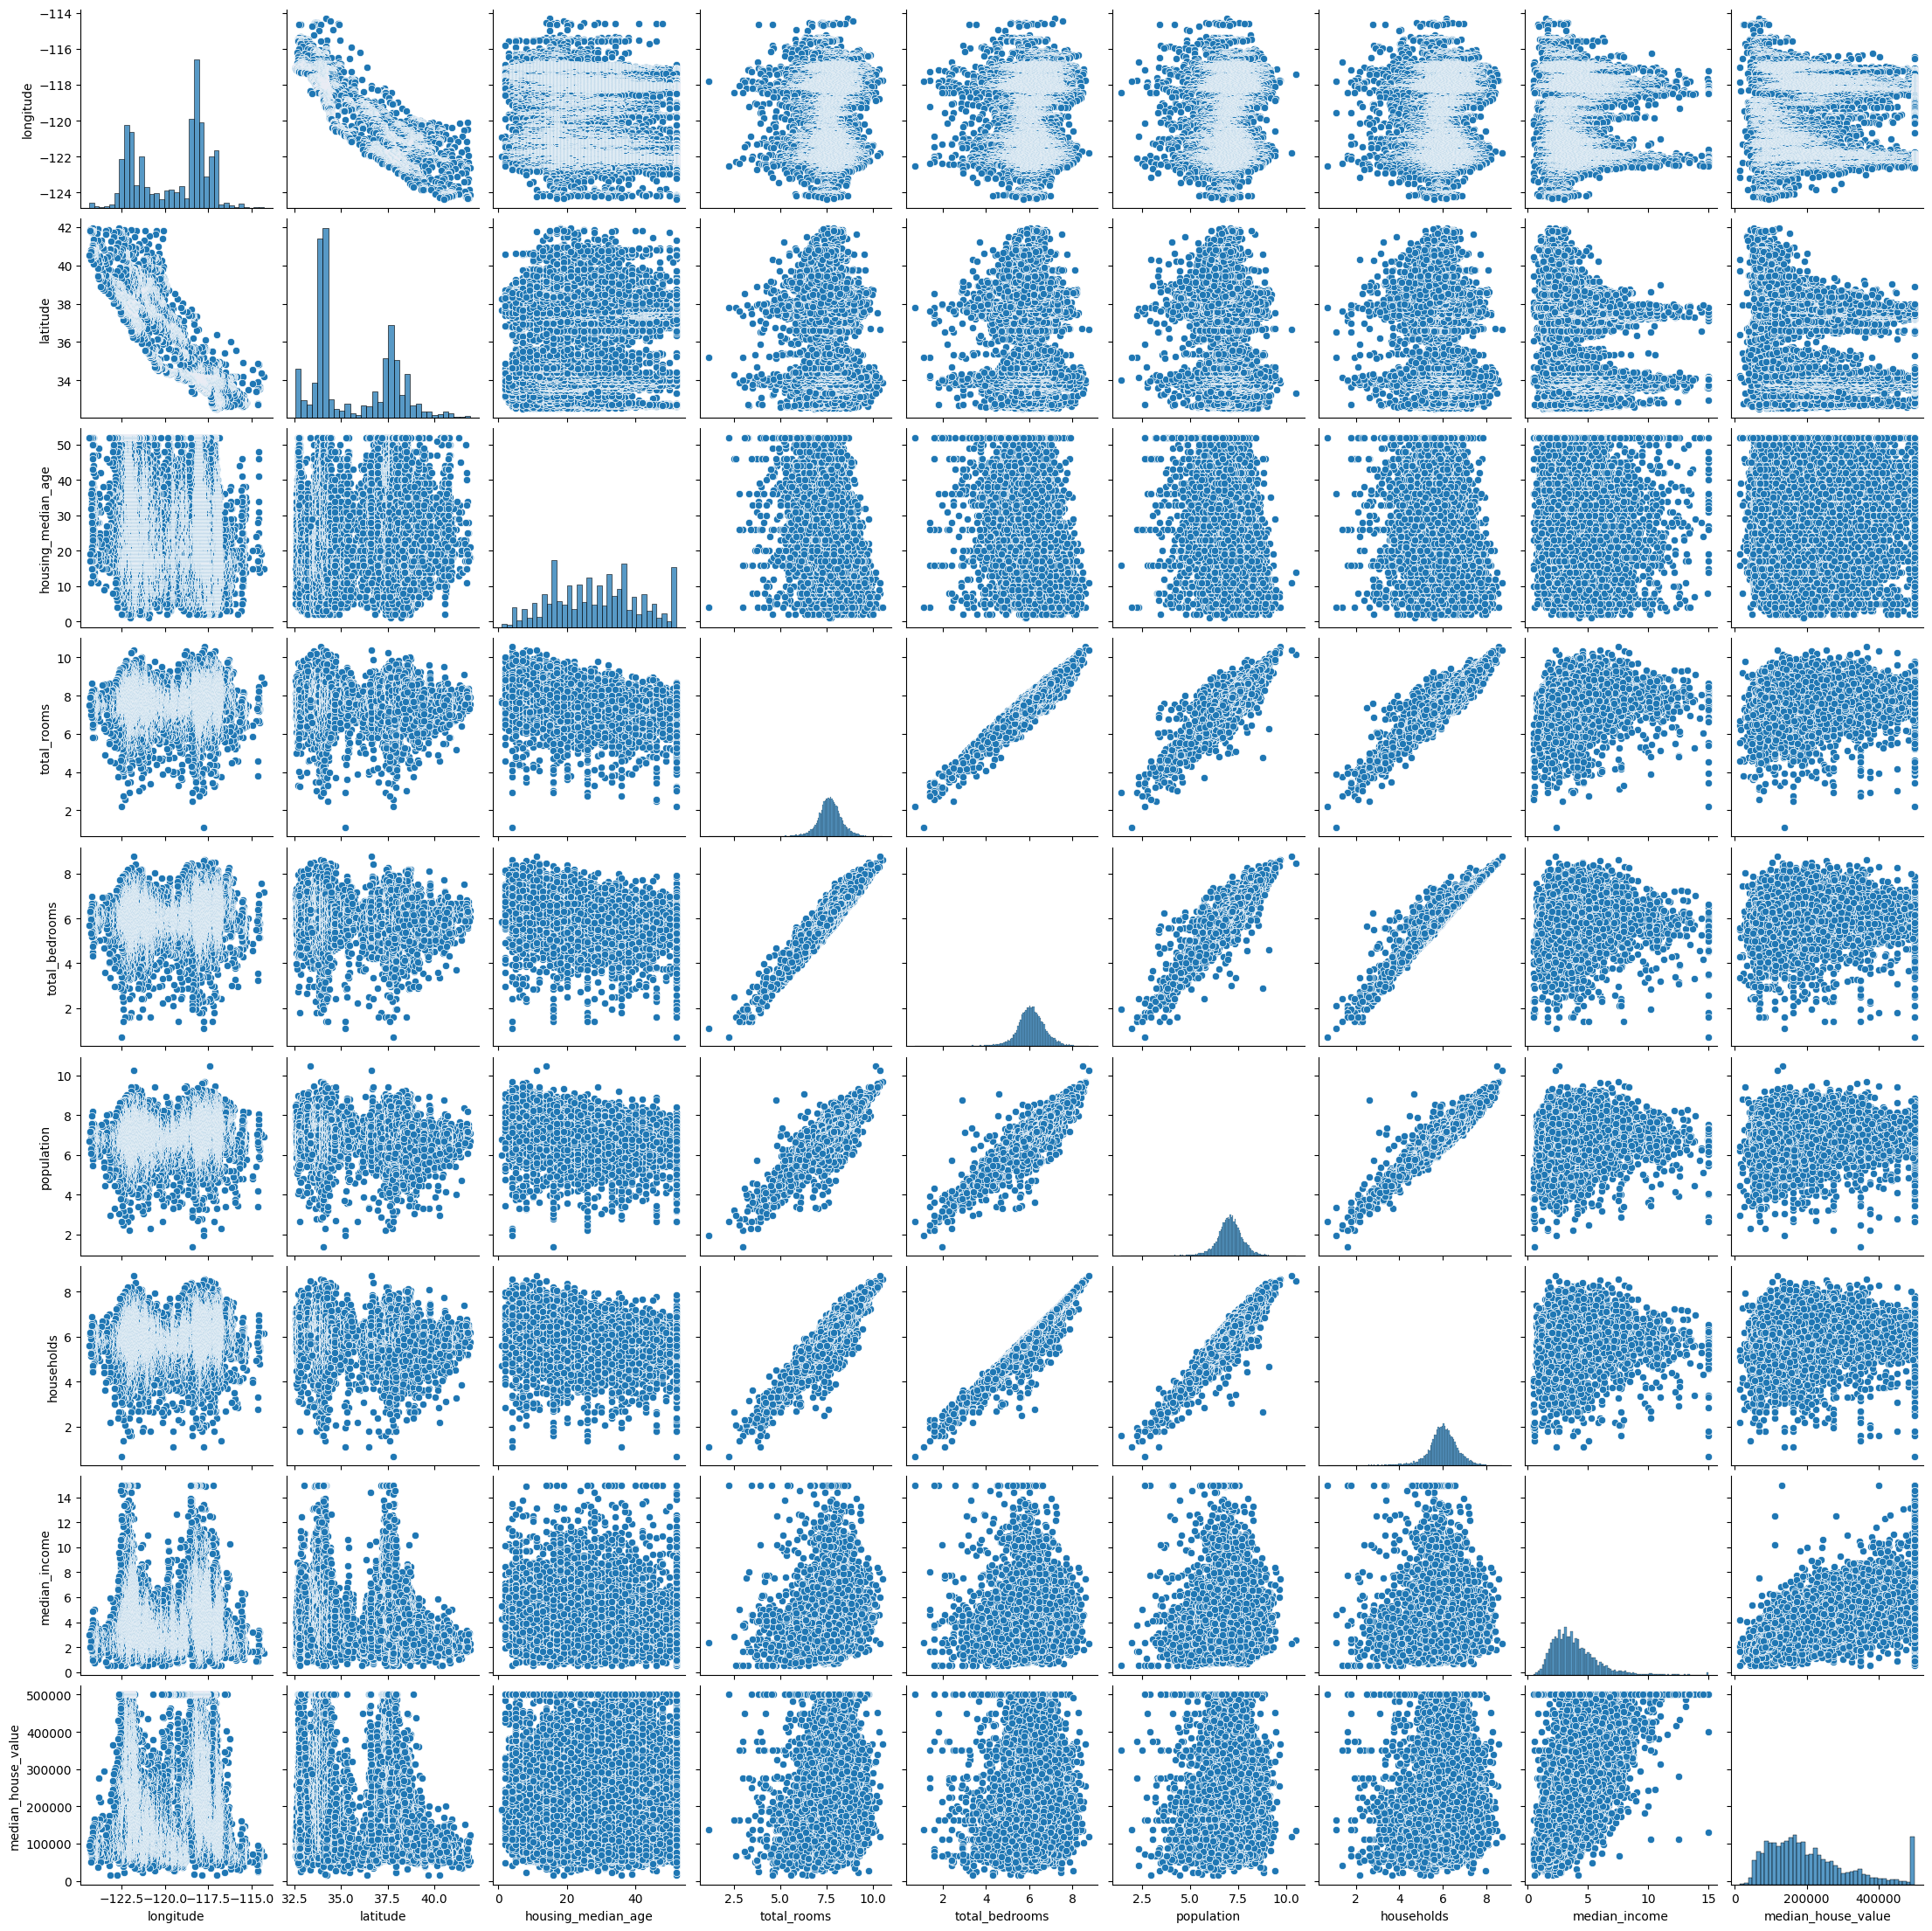

In [14]:
# Multivariant Analysis
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

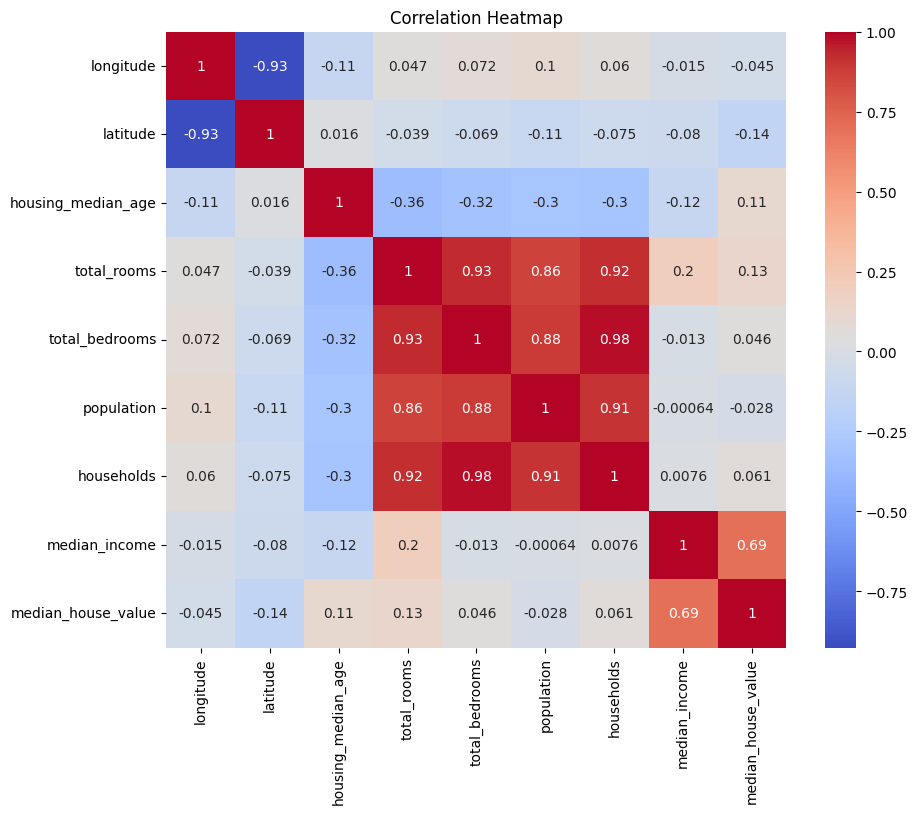

In [7]:
# using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()


Multivariants Analysis

# Correlation obersvation
Feature            | Correlation | Meaning            |
| ------------------ | ----------- | ------------------ |
| **median_income**  | **0.69**    |  Strong positive |
| housing_median_age | 0.11        | Weak               |
| total_rooms        | 0.13        | Weak               |
| households         | 0.061       | Very weak          |
| total_bedrooms     | 0.046       | Very weak          |
| population         | -0.028      | Almost none        |
| latitude           | -0.14       | Weak negative      |
| longitude          | -0.045      | Very weak          |

# multiocrrelation features vs features
| Feature Pair                 | Correlation | Meaning          |
| ---------------------------- | ----------- | ---------------- |
| total_rooms ↔ total_bedrooms | **0.93**    | Almost same info |
| total_bedrooms ↔ households  | **0.98**    | Redundant        |
| population ↔ households      | **0.91**    | Redundant        |
| total_rooms ↔ households     | **0.92**    | Redundant        |
| population ↔ total_rooms     | **0.86**    | Redundant        |


# Decide part
instead of using raw i do features engineering for multicorrelation features

1.   drop the raw features
2.   For linear regression its fine but Tree based capture all

1.   Do Feature Engineering






# Handle the outlier or right skew  


1.   Transform the data in those features show outlier or skewed
2.   why i am not using outlier techniques like

*   IQR
*   capping/trimming method

why-->
1.   Cuts off top & bottom values
2.   Removes valid data


1.   Biases model toward “average” houses
2.   Makes model poor for high-value predictions


1.   In housing price prediction, this is dangerous.
2.   instead of using outliers method i will use Transform techenique
# Transform techinique use


1.   Compresses extreme values
2.   Keeps all samples

1.   Reduces skew
2.   Preserves ordering


1.   Improves linear relationships


*   Log/Power
*   Apply log transformation



















In [8]:
# skew columns or outliers columns

skewed_cols = ['total_rooms', 'total_bedrooms', 'population', 'households']

for col in skewed_cols:
    df[col] = np.log1p(df[col])


In [9]:
# check the skew after do the log transform
df[skewed_cols].skew()


total_rooms      -1.004095
total_bedrooms   -0.927331
population       -0.973562
households       -0.990249
dtype: float64

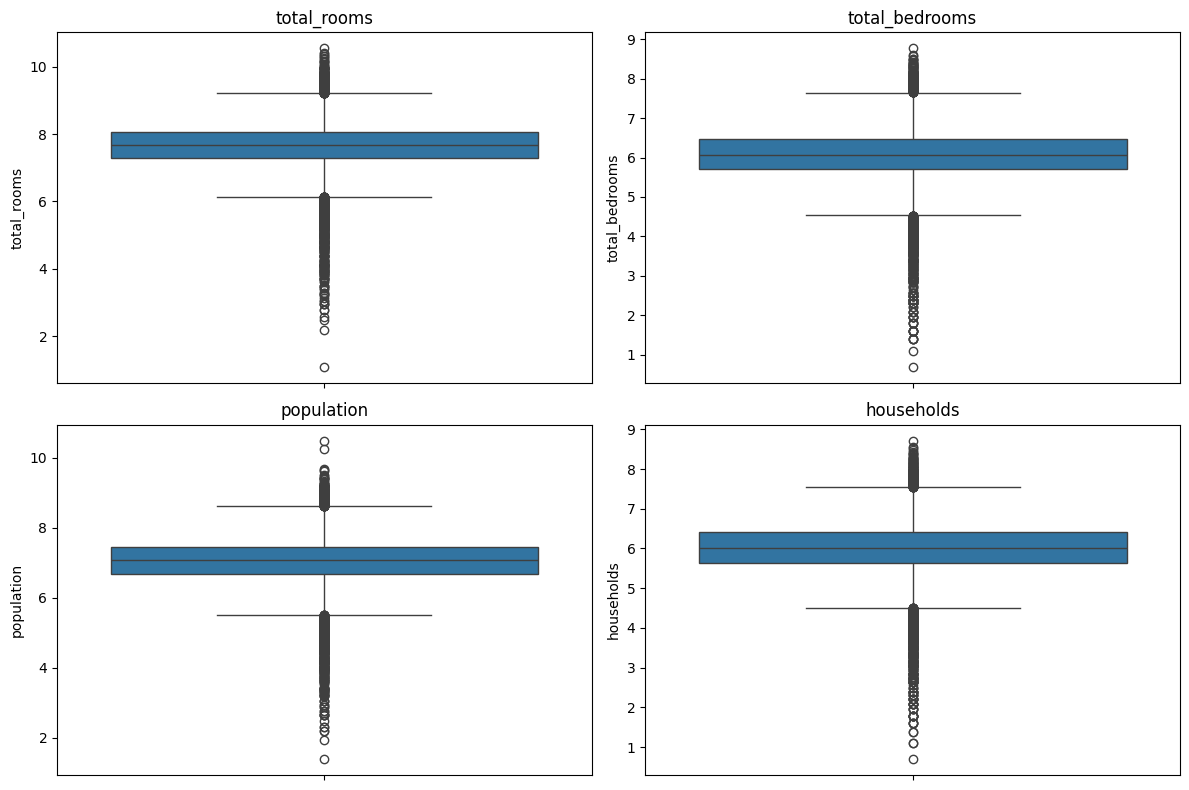

In [11]:
# for verification replot the boxplot
plt.figure(figsize=(12,8))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


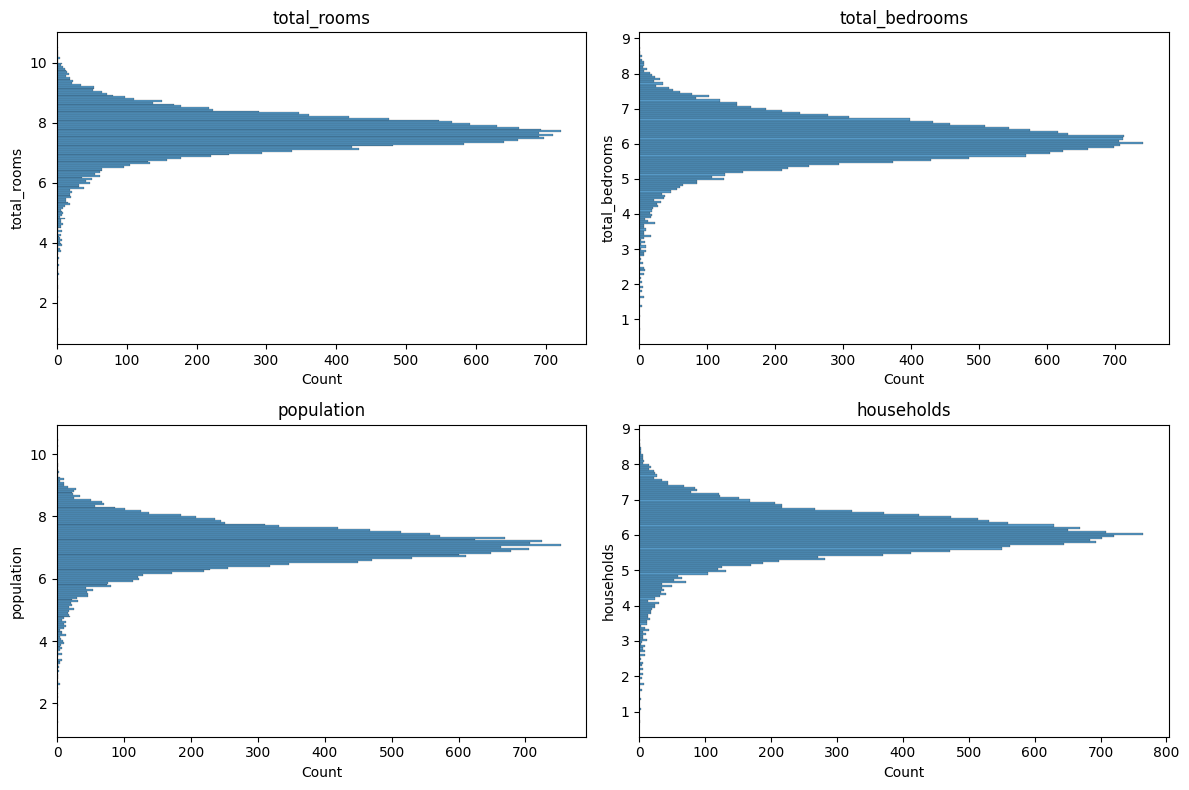

In [13]:
plt.figure(figsize=(12,8))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### Outlier Treatment After Log Transformation

After applying logarithmic transformation to highly right-skewed features,
the distributions became significantly more compact and symmetric.
Although some outliers are still visible in the boxplots, their influence
has been substantially reduced.

These remaining outliers represent valid real-world observations and no
longer dominate the feature scale. Therefore, no further outlier removal
was performed. The transformed features are now suitable for linear models,
while tree-based models remain unaffected by skewness.


#Feature Enginnering

Convert raw, noisy, correlated features into meaningful, stable, and informative features that models can learn from.

| Feature                  | Meaning              |
| ------------------------ | -------------------- |
| rooms_per_household      | House size / comfort |
| bedrooms_per_room        | Crowding indicator   |
| population_per_household | Density / congestion |


In [15]:
# create maenigful feature
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']


In [16]:
# drop the raw feature
df_linear = df.drop(
    ['total_rooms', 'total_bedrooms', 'population'],
    axis=1
)


In [17]:
#This step removes invalid values created during feature engineering (such as division by zero)
# to ensure the dataset contains only finite values that machine learning models can process reliably.
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


In [18]:
# i copied the data for tree based model
df_tree = df.copy()

# Final Feature List


1.   longitude
2.   latitude


1.   housing_median_income

2.   median_income

1.   population_per_household
2.   bedrooms_per_room

1.   rooms_per_household
2.   households (optional)



*   Target Feature
|
*   median_house_value










# Model Training

In [24]:
# drop the raw features
features_to_drop = [
    'total_rooms',
    'total_bedrooms',
    'population'
]

df_linear = df.drop(columns=features_to_drop)


In [27]:
df_linear.head()

longitude  latitude  housing_median_age  households  median_income  \
0    -114.31     34.19                15.0    6.159095         1.4936   
1    -114.47     34.40                19.0    6.139885         1.8200   
2    -114.56     33.69                17.0    4.770685         1.6509   
3    -114.57     33.64                14.0    5.424950         3.1917   
4    -114.57     33.57                20.0    5.572154         1.9250   

   median_house_value  rooms_per_household  bedrooms_per_room  \
0             66900.0             1.401641           0.829129   
1             80100.0             1.456476           0.844348   
2             85700.0             1.379391           0.784846   
3             73400.0             1.348317           0.796090   
4             65500.0             1.306992           0.795023   

   population_per_household  
0                  1.124131  
1                  1.144968  
2                  1.218094  
3                  1.151367  
4                  1.155343

In [28]:
# seperate the target varible

X = df_linear.drop('median_house_value', axis=1)
y = df_linear['median_house_value']

In [29]:
X.shape # shape of input features heere 17000 values and 8 features

(17000, 8)

In [30]:
y.shape # target values

(17000,)

# Train Test Split the data for training

In [31]:
# use train_test_splitd() from skict-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [32]:
X_train.shape

(13600, 8)

In [33]:
y_train.shape

(13600,)

# model Train

In [35]:
#first check with the  base model
#and use pipeline in pipelien use
#standardScaler-->It transforms data so that the mean becomes 0 and the standard deviation becomes 1

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


In [36]:
# fit the model
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, r2_lr


(np.float64(68316.7421570982), 0.661279579068539)

# train the all regression model and check the accuracy

In [44]:
# evulation function

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2


In [45]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.001),
    "Ridge": Ridge(alpha=1.0),
    "K Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(
        objective="reg:squarederror",
        n_estimators=300,
        random_state=42
    ),
    "LightGBM": LGBMRegressor(random_state=42)
}


In [46]:
results = []

for model_name, model in models.items():

    # Apply scaling only when required
    if model_name in [
        "Linear Regression",
        "Lasso",
        "Ridge",
        "K Neighbors Regressor"
    ]:
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model)
        ])
    else:
        pipeline = model

    # Train
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    # Evaluate
    mae, rmse, r2 = evaluate_model(y_test, y_pred)

    # Store results
    results.append({
        "Model": model_name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 13600, number of used features: 8
[LightGBM] [Info] Start training from score 206707.856103


In [47]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="R2", ascending=False)


Model           MAE          RMSE        R2
9               LightGBM  31680.783936  47910.964482  0.833407
8                XGBoost  32309.605054  48569.229284  0.828798
5          Random Forest  33561.930173  51513.530405  0.807412
7      Gradient Boosting  37152.520530  53617.474282  0.791359
3  K Neighbors Regressor  41160.962882  60532.427126  0.734072
0      Linear Regression  49354.499246  68316.742157  0.661280
1                  Lasso  49354.499294  68316.742321  0.661280
2                  Ridge  49353.727681  68316.833219  0.661279
4          Decision Tree  47776.871176  73924.955551  0.603385
6               AdaBoost  73658.197250  85873.172635  0.464817

# Final Model: LightGBM Regressor
Why LightGBM?

Best R²

Lowest RMSE

Fast training

Handles large datasets well
this model is well but i want to further retrain on differnet parameter

In [51]:
param_grids = {

    "K Neighbors Regressor": {
        "model__n_neighbors": [3, 5, 7, 9],
        "model__weights": ["uniform", "distance"]
    },

    "Decision Tree": {
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },

    "Random Forest": {
        "n_estimators": [200, 300],
        "max_depth": [None, 20, 30],
        "min_samples_split": [2, 5]
    },

    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    },

    "XGBoost": {
        "n_estimators": [200, 300],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    },

    "LightGBM": {
        "n_estimators": [200, 300],
        "learning_rate": [0.05, 0.1],
        "num_leaves": [31, 50]
    }
}


In [52]:
from sklearn.model_selection import GridSearchCV

def tune_model(model, params, X_train, y_train):
    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=3,
        scoring="r2",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    return grid.best_estimator_


In [53]:
tuned_results = []

for model_name, model in models.items():

    print(f"Tuning {model_name}...")

    # Apply scaling only if required
    if model_name in [
        "Linear Regression",
        "Lasso",
        "Ridge",
        "K Neighbors Regressor"
    ]:
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model)
        ])
        base_model = pipeline
    else:
        base_model = model

    # Tune if parameters exist
    if model_name in param_grids:
        best_model = tune_model(
            base_model,
            param_grids[model_name],
            X_train,
            y_train
        )
    else:
        best_model = base_model
        best_model.fit(X_train, y_train)

    # Predict
    y_pred = best_model.predict(X_test)

    # Evaluate
    mae, rmse, r2 = evaluate_model(y_test, y_pred)

    tuned_results.append({
        "Model": model_name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })


Tuning Linear Regression...
Tuning Lasso...
Tuning Ridge...
Tuning K Neighbors Regressor...
Tuning Decision Tree...
Tuning Random Forest...
Tuning AdaBoost...
Tuning Gradient Boosting...
Tuning XGBoost...
Tuning LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 13600, number of used features: 8
[LightGBM] [Info] Start training from score 206707.856103


In [54]:
tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df.sort_values(by="R2", ascending=False)


Model           MAE          RMSE        R2
9               LightGBM  30264.613877  46577.179520  0.842553
8                XGBoost  31192.177517  47110.416317  0.838928
7      Gradient Boosting  32106.024281  48165.501451  0.831632
5          Random Forest  33561.930173  51513.530405  0.807412
3  K Neighbors Regressor  40475.884367  59405.172466  0.743885
4          Decision Tree  43598.975755  65203.724042  0.691445
0      Linear Regression  49354.499246  68316.742157  0.661280
1                  Lasso  49354.499294  68316.742321  0.661280
2                  Ridge  49353.727681  68316.833219  0.661279
6               AdaBoost  73658.197250  85873.172635  0.464817

In [1]:
from sklearn.model_selection import cross_val_score

# Train score
train_score = best_model.score(X_train, y_train)

# Cross-validation score
cv_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring="r2").mean()

# Test score
test_score = best_model.score(X_test, y_test)

train_score, cv_score, test_score


NameError: name 'best_model' is not defined

# Model Performance Visulization



1.   R² comparison (all models)
2.   RMSE comparison (all models)


1.   Actual vs Predicted (best model)
2.   Residual distribution (best model)






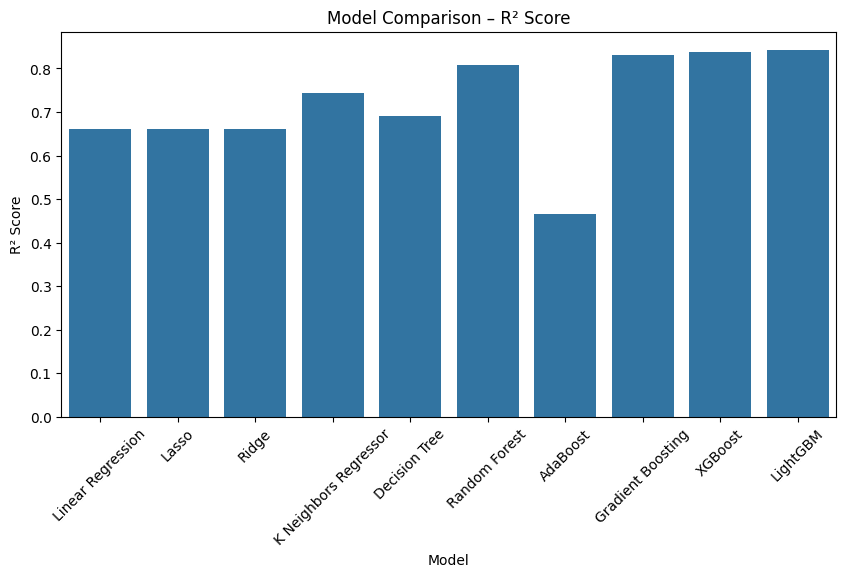

In [55]:
#R² Score Comparison (Most Important)

plt.figure(figsize=(10,5))
sns.barplot(data=tuned_results_df, x="Model", y="R2")
plt.xticks(rotation=45)
plt.title("Model Comparison – R² Score")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.show()

#WHY this plot?

#Shows variance explained

#Higher bar = better model

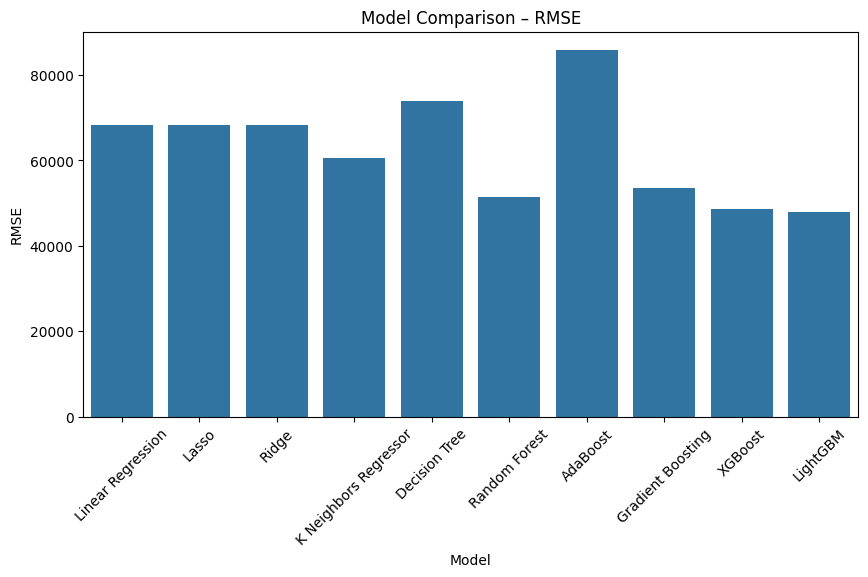

In [56]:
"""RMSE Comparison (Error Perspective)
 WHY this plot?

Shows average prediction error

Lower bar = better model"""
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x="Model", y="RMSE")
plt.xticks(rotation=45)
plt.title("Model Comparison – RMSE")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.show()


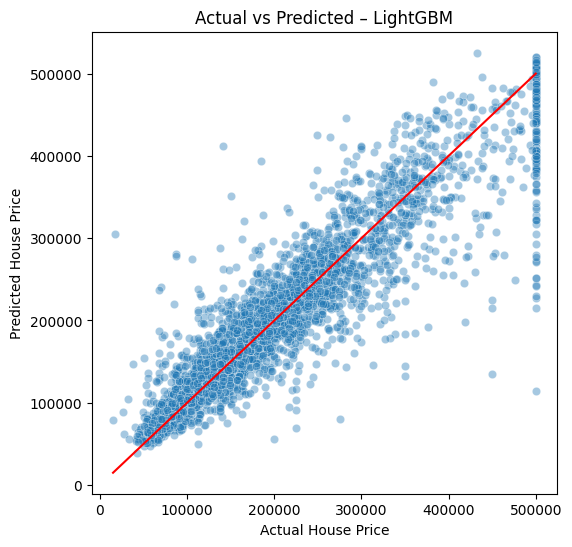

In [57]:
"""Actual vs Predicted (Final Model – LightGBM)
 WHY this plot?

Shows how close predictions are to reality

Ideal model → points near diagonal"""

# predictions from final model
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted – LightGBM")
plt.show()


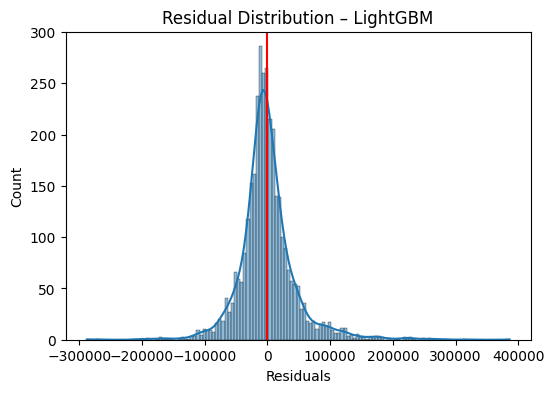

In [58]:
"""Residual Distribution (Error Analysis)
WHY this plot?

Checks bias

Checks symmetry

Ensures no systematic error"""
residuals = y_test - y_pred_best

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red')
plt.title("Residual Distribution – LightGBM")
plt.xlabel("Residuals")
plt.show()


# Model visulation Observation
## Model Performance Visualization

Model comparison plots using R² and RMSE show that boosting-based
models outperform linear and bagging approaches.
LightGBM achieved the highest R² and lowest RMSE.

Actual vs Predicted and residual plots indicate a strong overall fit,
with residuals centered near zero and no significant systematic bias.
These results confirm LightGBM as the final production model.


## Final Model Selection

After hyperparameter tuning, LightGBM achieved the best performance
among all evaluated models, with an R² score of approximately 0.84
and the lowest RMSE.

Boosting-based models consistently outperformed linear and bagging
methods, confirming the presence of strong non-linear relationships
and feature interactions in the dataset.

Based on accuracy, efficiency, and robustness, LightGBM was selected
as the final production model.


In [59]:
import joblib

# save trained model
joblib.dump(best_model, "lightgbm_house_price_model.pkl")


['lightgbm_house_price_model.pkl']

Model selected and MODEL Save


1.   LightGBM




In [60]:
# feature save
feature_columns = X_train.columns.tolist()

joblib.dump(feature_columns, "model_features.pkl")


['model_features.pkl']

# inference for the model

1.   First load model using the pickel


1.   Then Feature load
2.   define the input features and call the predic funcion





In [61]:
import pickle
import joblib
loaded_model = joblib.load("lightgbm_house_price_model.pkl")
loaded_features = joblib.load("model_features.pkl")


In [62]:
# this is prediction function
def predict_price(model, feature_columns, input_dict):
    import pandas as pd

    df_input = pd.DataFrame([input_dict])
    df_input = df_input[feature_columns]  # enforce correct order

    return model.predict(df_input)[0]


In [63]:
# input data in form of dictory
input_data = {
    "longitude": -114.31,
    "latitude": 34.19,
    "housing_median_age": 20,
    "median_income": 3.2,
    "rooms_per_household": 1.4,
    "bedrooms_per_room": 0.8,
    "population_per_household": 1.2,
    "households": 450
}



In [68]:
# model predict them
price = predict_price(
    loaded_model,
    loaded_features,
    input_data
)

print("The house price",price.round())


The house price 88492.0


In [ ]:
# HERE CHECK THE LINK I HOSTED THE PROJECT ON THE SERVER 
https://manishitech.netlify.app/

# HERE CHECK THE LINK I HOSTED THE PROJECT ON THE SERVER 
https://manishitech.netlify.app/

# final result
### Inference Result

The trained LightGBM model successfully generated a house price
prediction of approximately $88,492 for the given input features.
The predicted value lies within the expected range of the dataset
and reflects the influence of location and median income, confirming
correct model behavior during inference.
